<a href="https://colab.research.google.com/github/GuanRuLai/Python-Maching-Learning/blob/main/Support_Vector_Regression(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import dataset

In [37]:
import os
if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

import pandas as pd
df = pd.read_csv("Position_Salaries.csv")

## Split independent variables and dependent variable

In [38]:
import HappyML.preprocessor as pp

X, Y = pp.decomposition(dataset=df, x_columns=[1], y_columns=[-1])
X = X.values
Y = Y.values
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Handle missing data

In [39]:
print(df.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64


## Feature scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Linear model processing

## Model training

In [41]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")
regressor.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Visualizing results

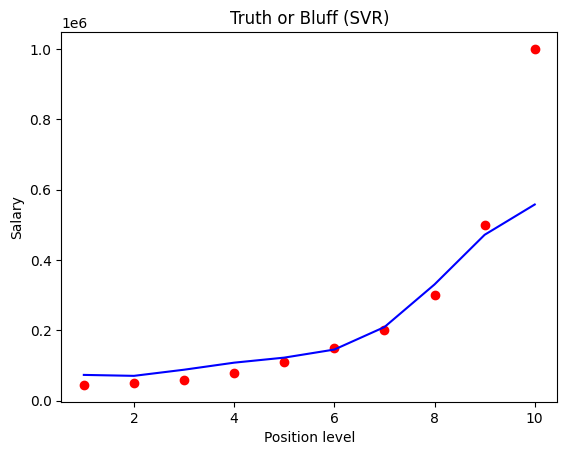

In [42]:
import matplotlib.pyplot as plt

plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red', label='Actual Data')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue', label='Regression Line')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing results(smoother curve & higher resolution)

[[-1.56669890e+00]
 [-1.53188337e+00]
 [-1.49706784e+00]
 [-1.46225231e+00]
 [-1.42743678e+00]
 [-1.39262125e+00]
 [-1.35780572e+00]
 [-1.32299019e+00]
 [-1.28817465e+00]
 [-1.25335912e+00]
 [-1.21854359e+00]
 [-1.18372806e+00]
 [-1.14891253e+00]
 [-1.11409700e+00]
 [-1.07928147e+00]
 [-1.04446594e+00]
 [-1.00965040e+00]
 [-9.74834873e-01]
 [-9.40019342e-01]
 [-9.05203811e-01]
 [-8.70388280e-01]
 [-8.35572749e-01]
 [-8.00757217e-01]
 [-7.65941686e-01]
 [-7.31126155e-01]
 [-6.96310624e-01]
 [-6.61495093e-01]
 [-6.26679561e-01]
 [-5.91864030e-01]
 [-5.57048499e-01]
 [-5.22232968e-01]
 [-4.87417437e-01]
 [-4.52601905e-01]
 [-4.17786374e-01]
 [-3.82970843e-01]
 [-3.48155312e-01]
 [-3.13339781e-01]
 [-2.78524250e-01]
 [-2.43708718e-01]
 [-2.08893187e-01]
 [-1.74077656e-01]
 [-1.39262125e-01]
 [-1.04446594e-01]
 [-6.96310624e-02]
 [-3.48155312e-02]
 [ 1.23689614e-15]
 [ 3.48155312e-02]
 [ 6.96310624e-02]
 [ 1.04446594e-01]
 [ 1.39262125e-01]
 [ 1.74077656e-01]
 [ 2.08893187e-01]
 [ 2.4370871

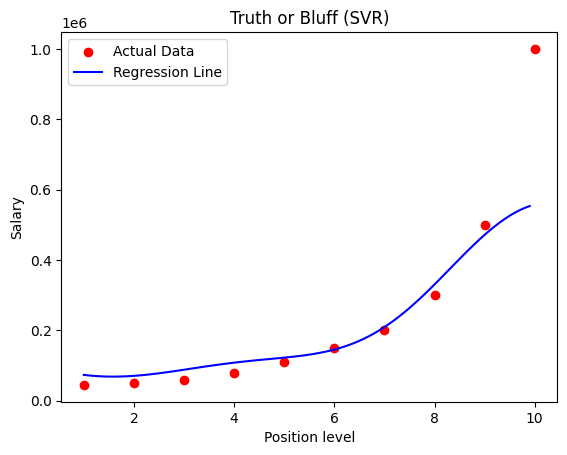

In [43]:
import numpy as np

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1) # add float
X_grid = X_grid.reshape((len(X_grid), 1)) # turn 1 row, 10 columns into 10 rows, 1 column
X_grid = sc_X.transform(X_grid)
print(X_grid)

plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red', label='Actual Data')
plt.plot(sc_X.inverse_transform(X_grid), sc_Y.inverse_transform(regressor.predict(X_grid).reshape(-1, 1)), color = 'blue', label='Regression Line')
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel('Salary')
plt.legend()
plt.show()

## Answer prediction

In [44]:
print(sc_Y.inverse_transform(regressor.predict(sc_X.transform([[8.5]])).reshape(-1, 1)))

[[403162.81672181]]
